In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt as opt
from cvxopt import blas, solvers
import cvxpy as cp
import pyfolio as pf

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pyfolio\pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


# Process data

In [2]:
data = pd.read_csv('FX Return.csv')
data.head()

,Date,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
0,2011/1/4,0.006743,0.006543,0.001441,0.000935,0.002173,0.004875,0.007101
1,2011/1/5,0.004506,0.001898,0.011925,-0.002929,-0.005054,-0.009073,0.000122
2,2011/1/6,0.014030,0.001492,0.008128,0.001302,0.006533,-0.005784,0.014343
3,2011/1/7,0.001334,-0.012090,-0.002326,-0.002268,-0.005352,0.001452,0.000360
4,2011/1/10,-0.003241,-0.009527,0.002611,0.001542,-0.000723,-0.004117,0.002635


In [3]:
data.index = data['Date']
data.pop('Date') 
data.head()

,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
Date,,,,,,,
2011/1/4,0.006743,0.006543,0.001441,0.000935,0.002173,0.004875,0.007101
2011/1/5,0.004506,0.001898,0.011925,-0.002929,-0.005054,-0.009073,0.000122
2011/1/6,0.014030,0.001492,0.008128,0.001302,0.006533,-0.005784,0.014343
2011/1/7,0.001334,-0.012090,-0.002326,-0.002268,-0.005352,0.001452,0.000360
2011/1/10,-0.003241,-0.009527,0.002611,0.001542,-0.000723,-0.004117,0.002635


Five assets

In [4]:
USDJPY = data['USDJPY']
USDJPY

Date
2011/1/4      0.006743
2011/1/5      0.004506
2011/1/6      0.014030
2011/1/7      0.001334
2011/1/10    -0.003241
                ...   
2020/12/25    0.000975
2020/12/28   -0.001158
2020/12/29    0.001507
2020/12/30   -0.001254
2020/12/31   -0.004229
Name: USDJPY, Length: 2608, dtype: float64

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Cummulative Daily return - USDJPY'}, xlabel='Date'>

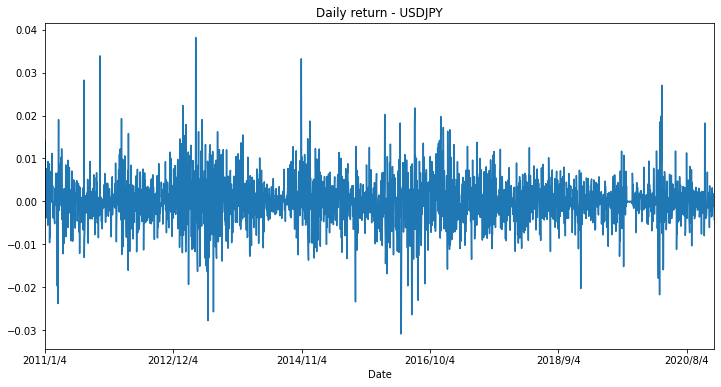

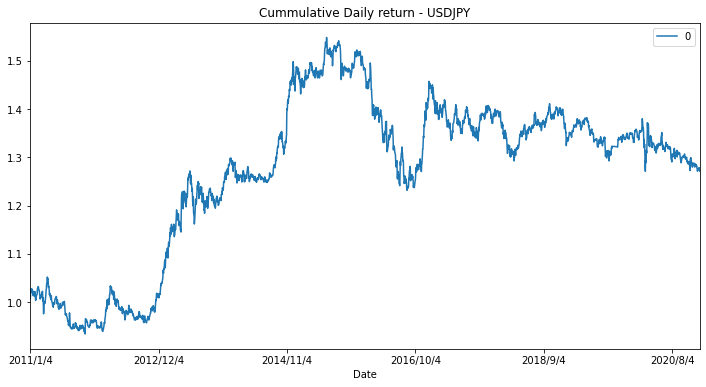

In [5]:
USDJPY.plot(title = 'Daily return - USDJPY', figsize=(12, 6))
cum_datalist=[1+x for x in USDJPY] 
cum_datalist=pd.DataFrame(cum_datalist, index=data.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - USDJPY', figsize=(12, 6))

In [6]:
EURJPY = data['EURJPY']
EURJPY

Date
2011/1/4      0.006543
2011/1/5      0.001898
2011/1/6      0.001492
2011/1/7     -0.012090
2011/1/10    -0.009527
                ...   
2020/12/25   -0.000024
2020/12/28    0.000895
2020/12/29    0.003015
2020/12/30    0.001191
2020/12/31   -0.000347
Name: EURJPY, Length: 2608, dtype: float64

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Cummulative Daily return - EURJPY'}, xlabel='Date'>

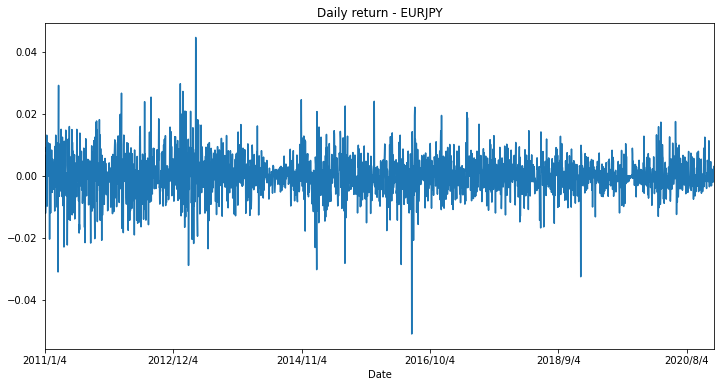

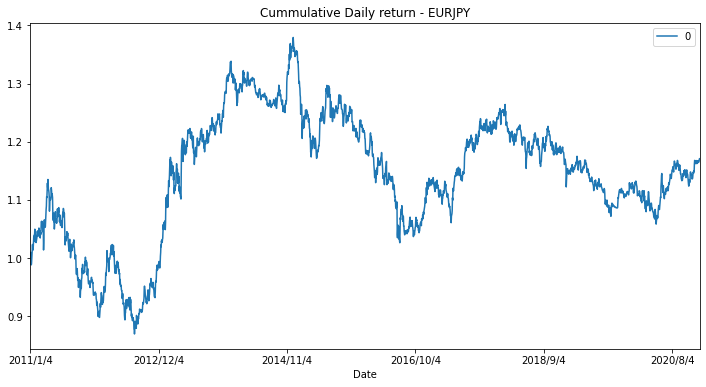

In [7]:
EURJPY.plot(title = 'Daily return - EURJPY', figsize=(12, 6))
cum_datalist=[1+x for x in EURJPY] 
cum_datalist=pd.DataFrame(cum_datalist, index=data.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - EURJPY', figsize=(12, 6))

In [8]:
GBPJPY = data['GBPJPY']
GBPJPY

Date
2011/1/4      0.001441
2011/1/5      0.011925
2011/1/6      0.008128
2011/1/7     -0.002326
2011/1/10     0.002611
                ...   
2020/12/25    0.002017
2020/12/28    0.002798
2020/12/29   -0.006235
2020/12/30    0.001225
2020/12/31    0.005315
Name: GBPJPY, Length: 2608, dtype: float64

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Cummulative Daily return - GBPJPY'}, xlabel='Date'>

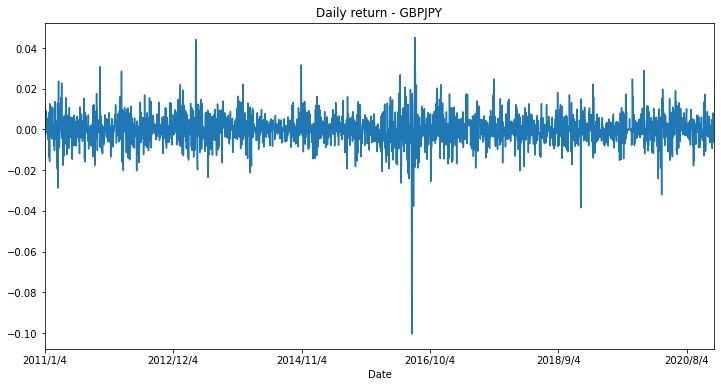

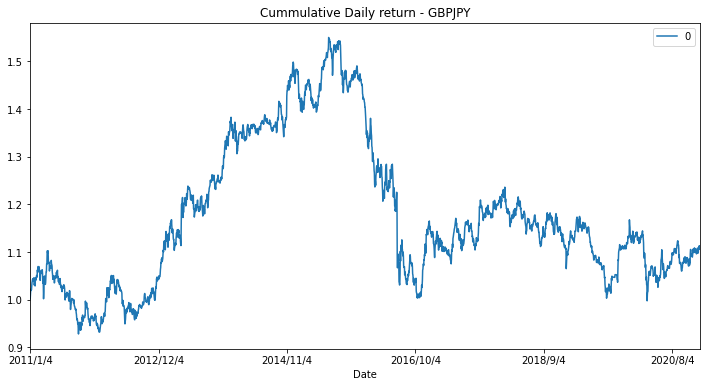

In [9]:
GBPJPY.plot(title = 'Daily return - GBPJPY', figsize=(12, 6))
cum_datalist=[1+x for x in GBPJPY] 
cum_datalist=pd.DataFrame(cum_datalist, index=data.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - GBPJPY', figsize=(12, 6))

In [10]:
NZDJPY = data['NZDJPY']
NZDJPY

Date
2011/1/4      0.000935
2011/1/5     -0.002929
2011/1/6      0.001302
2011/1/7     -0.002268
2011/1/10     0.001542
                ...   
2020/12/25   -0.007282
2020/12/28    0.009803
2020/12/29    0.000299
2020/12/30    0.004805
2020/12/31    0.004998
Name: NZDJPY, Length: 2608, dtype: float64

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Cummulative Daily return - NZDJPY'}, xlabel='Date'>

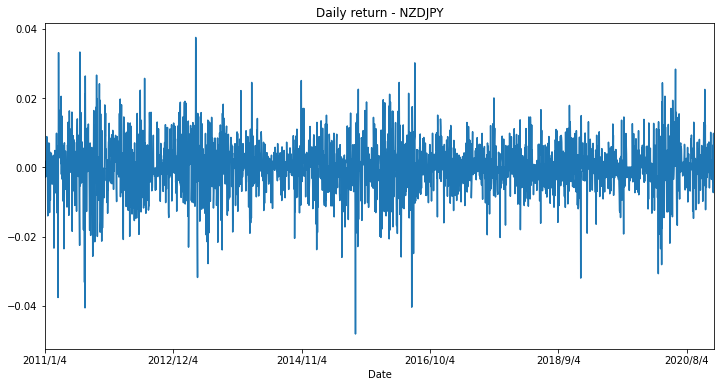

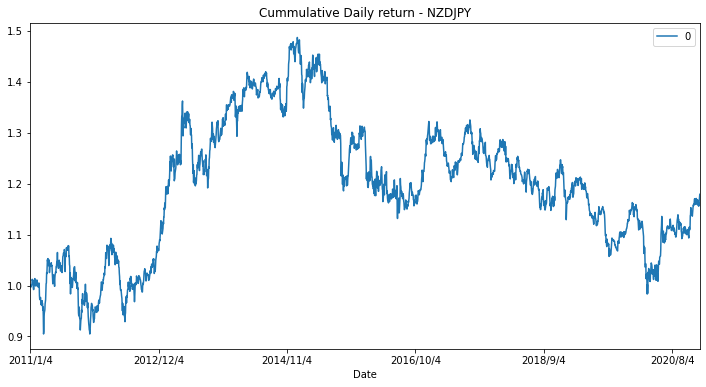

In [11]:
NZDJPY.plot(title = 'Daily return - NZDJPY', figsize=(12, 6))
cum_datalist=[1+x for x in NZDJPY] 
cum_datalist=pd.DataFrame(cum_datalist, index=data.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - NZDJPY', figsize=(12, 6))

In [12]:
AUDJPY = data['AUDJPY']
AUDJPY

Date
2011/1/4      0.002173
2011/1/5     -0.005054
2011/1/6      0.006533
2011/1/7     -0.005352
2011/1/10    -0.000723
                ...   
2020/12/25    0.002931
2020/12/28    0.001080
2020/12/29   -0.001485
2020/12/30    0.001614
2020/12/31    0.006091
Name: AUDJPY, Length: 2608, dtype: float64

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Cummulative Daily return - AUDJPY'}, xlabel='Date'>

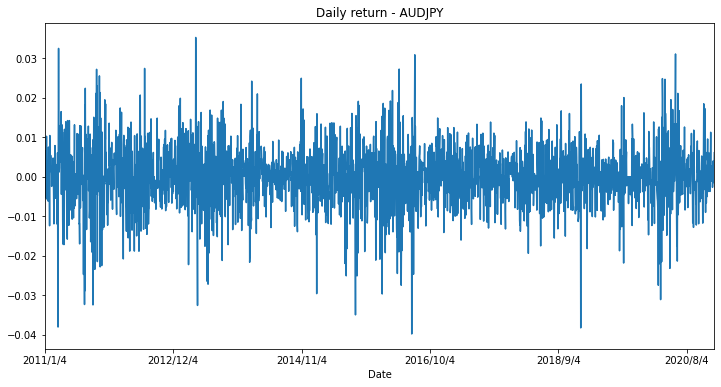

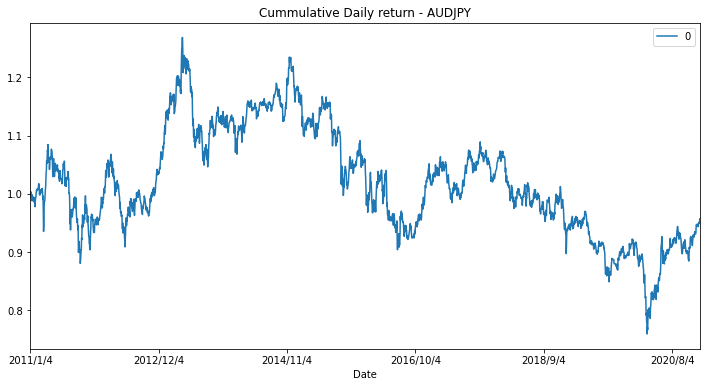

In [13]:
AUDJPY.plot(title = 'Daily return - AUDJPY', figsize=(12, 6))
cum_datalist=[1+x for x in AUDJPY] 
cum_datalist=pd.DataFrame(cum_datalist, index=data.index)
cum_datalist.cumprod().plot(title = 'Cummulative Daily return - AUDJPY', figsize=(12, 6))

Total 7 assets

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Cumulative Daily Return')

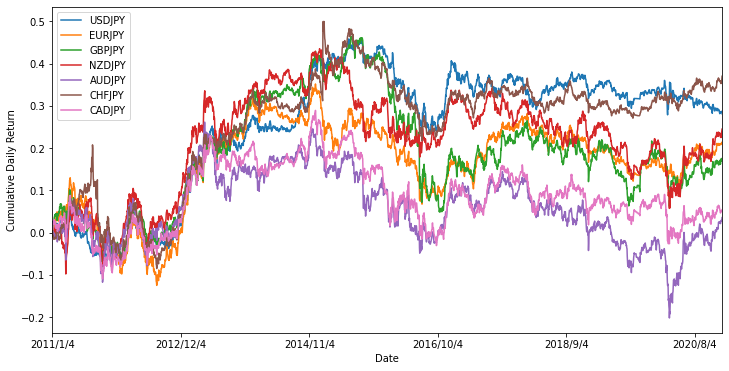

In [14]:
data.cumsum().plot(figsize=(12, 6))
plt.ylabel("Cumulative Daily Return")

In [15]:
data.head()

,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
Date,,,,,,,
2011/1/4,0.006743,0.006543,0.001441,0.000935,0.002173,0.004875,0.007101
2011/1/5,0.004506,0.001898,0.011925,-0.002929,-0.005054,-0.009073,0.000122
2011/1/6,0.014030,0.001492,0.008128,0.001302,0.006533,-0.005784,0.014343
2011/1/7,0.001334,-0.012090,-0.002326,-0.002268,-0.005352,0.001452,0.000360
2011/1/10,-0.003241,-0.009527,0.002611,0.001542,-0.000723,-0.004117,0.002635


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

Text(0, 0.5, 'Volatility')

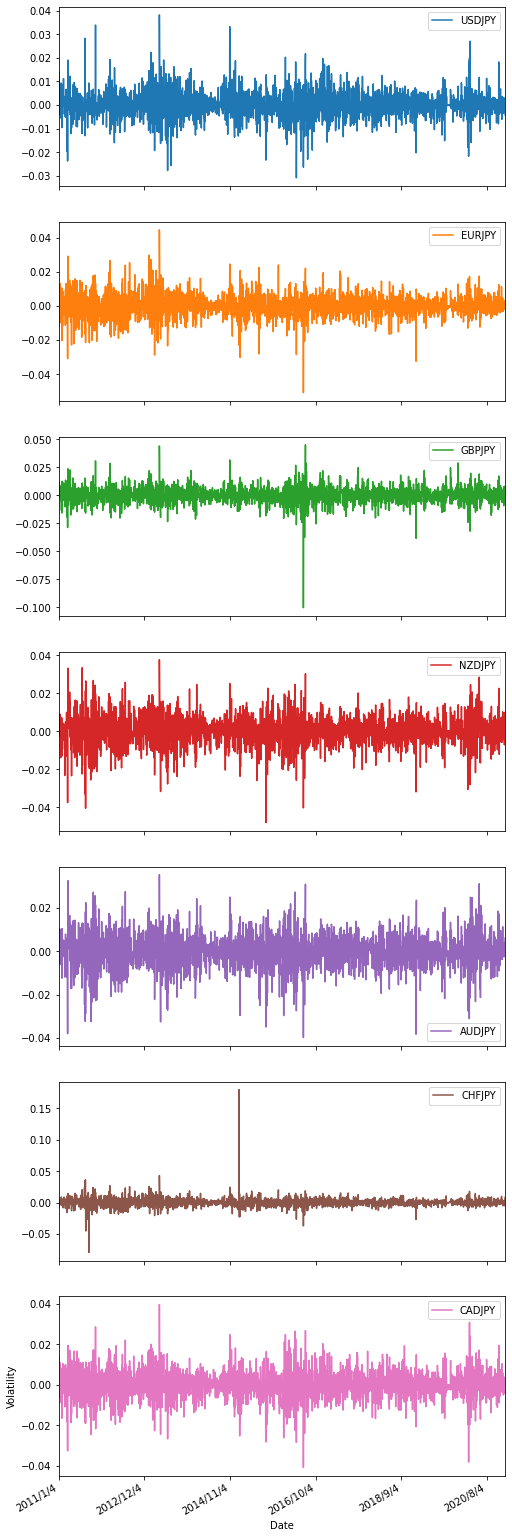

In [16]:
data.plot(figsize=(8,30),subplots=True)
plt.ylabel("Volatility")

# Basic analysis

In [17]:
data.describe()

,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
count,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,0.000108,0.000082,0.000067,0.000094,0.000014,0.000142,0.000021
std,0.005635,0.006546,0.007215,0.007836,0.007790,0.007125,0.006987
min,-0.030882,-0.050966,-0.100425,-0.048127,-0.039842,-0.079634,-0.040836
25%,-0.002903,-0.003324,-0.003587,-0.003910,-0.004080,-0.003064,-0.003838
50%,0.000062,0.000000,0.000087,0.000226,0.000180,0.000005,0.000000
75%,0.002977,0.003658,0.003825,0.004405,0.004357,0.003132,0.003945
max,0.038196,0.044535,0.045179,0.037510,0.035297,0.179818,0.039548


Return distribution

In [18]:
data.kurtosis()

USDJPY      4.043570
EURJPY      4.306240
GBPJPY     16.984544
NZDJPY      2.575605
AUDJPY      2.298002
CHFJPY    162.783943
CADJPY      2.396409
dtype: float64

In [19]:
data.skew()

USDJPY    0.191484
EURJPY   -0.116890
GBPJPY   -0.880769
NZDJPY   -0.290173
AUDJPY   -0.298464
CHFJPY    5.692605
CADJPY   -0.102980
dtype: float64

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

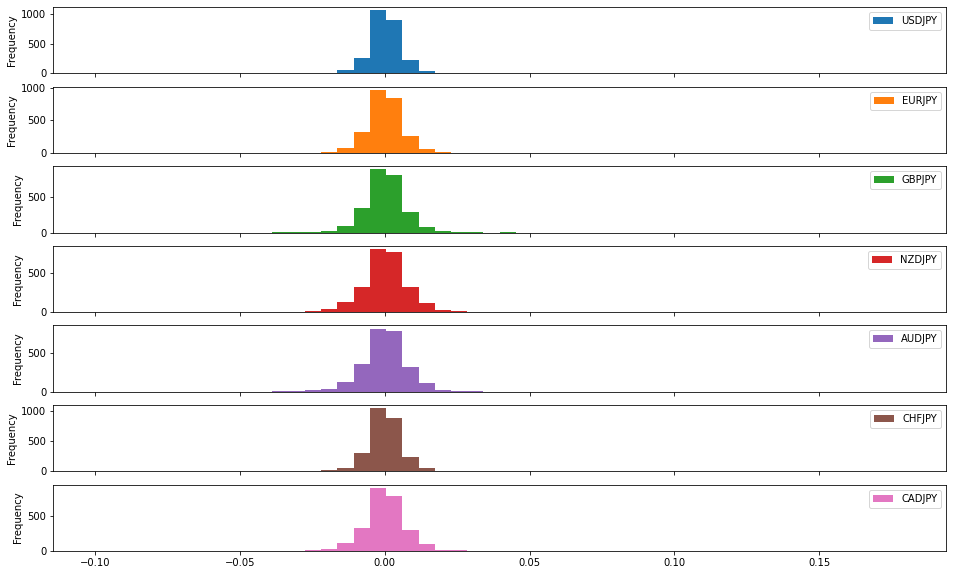

In [20]:
data.plot(kind="hist", bins=50, subplots=True, figsize=(16,10))

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

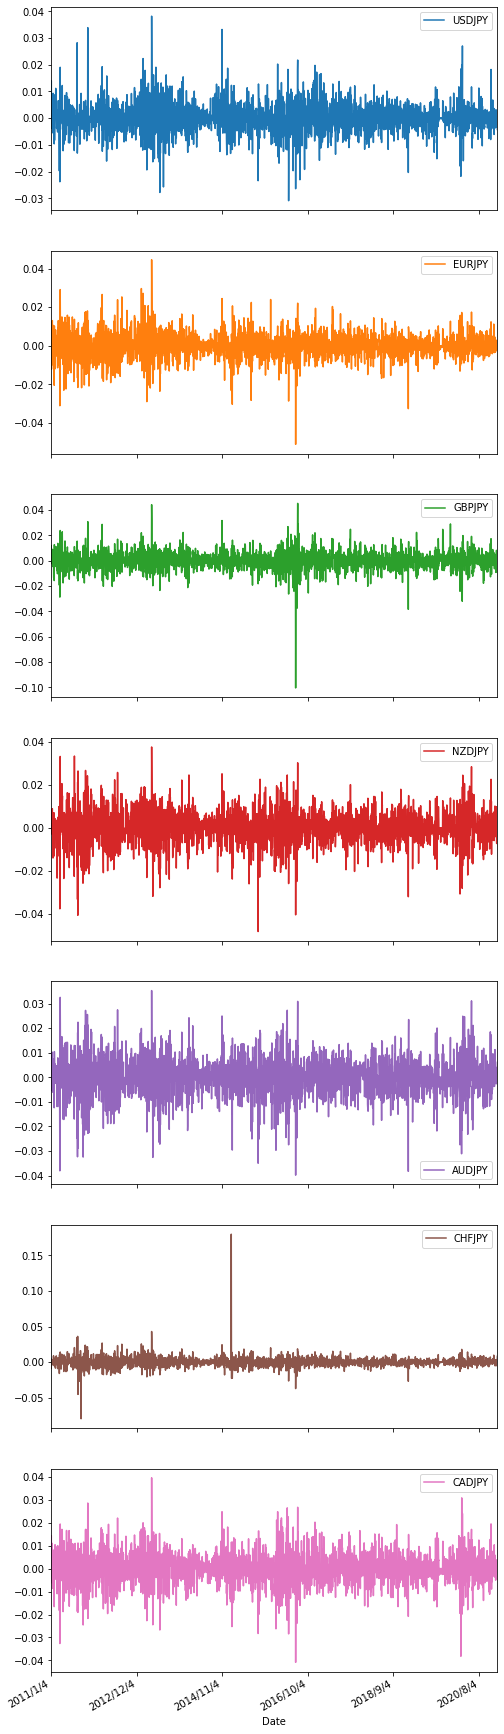

In [21]:
data.plot(figsize=(8,34),subplots=True)

array([[<AxesSubplot:title={'center':'AUDJPY'}>,
        <AxesSubplot:title={'center':'CADJPY'}>,
        <AxesSubplot:title={'center':'CHFJPY'}>],
       [<AxesSubplot:title={'center':'EURJPY'}>,
        <AxesSubplot:title={'center':'GBPJPY'}>,
        <AxesSubplot:title={'center':'NZDJPY'}>],
       [<AxesSubplot:title={'center':'USDJPY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

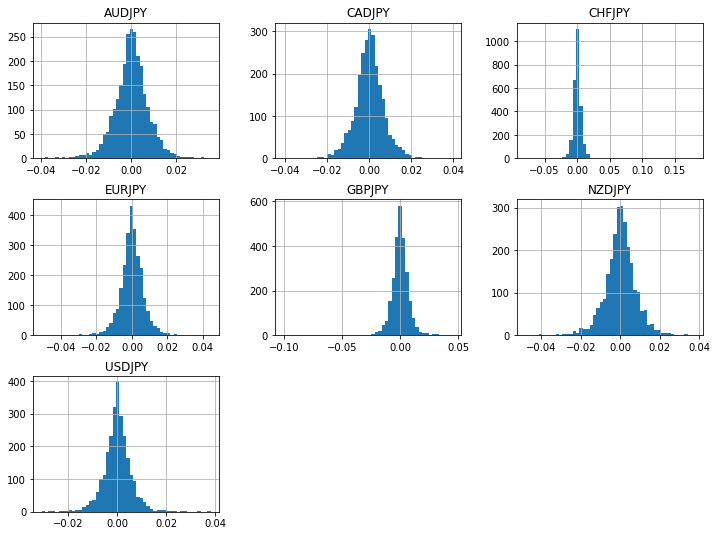

In [22]:
data.hist(bins=50, figsize=(12, 9))

In [23]:
corr = data.corr()
corr

,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
USDJPY,1.000000,0.619226,0.655468,0.523277,0.576606,0.443310,0.743254
EURJPY,0.619226,1.000000,0.724023,0.655831,0.676148,0.638604,0.689794
GBPJPY,0.655468,0.724023,1.000000,0.631216,0.670163,0.498513,0.699714
NZDJPY,0.523277,0.655831,0.631216,1.000000,0.854296,0.446613,0.723815
AUDJPY,0.576606,0.676148,0.670163,0.854296,1.000000,0.448293,0.785105
CHFJPY,0.443310,0.638604,0.498513,0.446613,0.448293,1.000000,0.465794
CADJPY,0.743254,0.689794,0.699714,0.723815,0.785105,0.465794,1.000000


<AxesSubplot:>

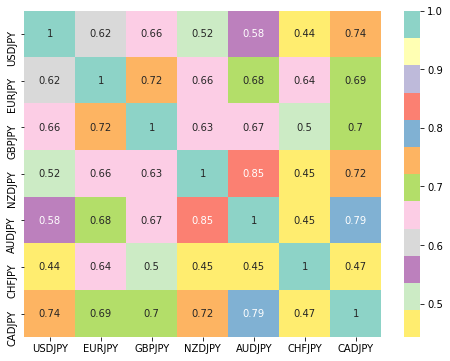

In [24]:
correlations = data.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(correlations, cmap='Set3_r', annot=True)

# Equal weighted portfolio

In [25]:
newdata = pd.read_csv('FX Return.csv')
newdata.head()

,Date,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
0,2011/1/4,0.006743,0.006543,0.001441,0.000935,0.002173,0.004875,0.007101
1,2011/1/5,0.004506,0.001898,0.011925,-0.002929,-0.005054,-0.009073,0.000122
2,2011/1/6,0.014030,0.001492,0.008128,0.001302,0.006533,-0.005784,0.014343
3,2011/1/7,0.001334,-0.012090,-0.002326,-0.002268,-0.005352,0.001452,0.000360
4,2011/1/10,-0.003241,-0.009527,0.002611,0.001542,-0.000723,-0.004117,0.002635


In [26]:
newdata['Date'] = pd.to_datetime(newdata['Date'])
newdata.set_index('Date', inplace=True)
newdata.head()

,USDJPY,EURJPY,GBPJPY,NZDJPY,AUDJPY,CHFJPY,CADJPY
Date,,,,,,,
2011-01-04,0.006743,0.006543,0.001441,0.000935,0.002173,0.004875,0.007101
2011-01-05,0.004506,0.001898,0.011925,-0.002929,-0.005054,-0.009073,0.000122
2011-01-06,0.014030,0.001492,0.008128,0.001302,0.006533,-0.005784,0.014343
2011-01-07,0.001334,-0.012090,-0.002326,-0.002268,-0.005352,0.001452,0.000360
2011-01-10,-0.003241,-0.009527,0.002611,0.001542,-0.000723,-0.004117,0.002635


In [27]:
a=1/7
b=1/7
c=1/7
d=1/7
e=1/7
f=1/7
g=1/7

In [28]:
portfolio_total_return = np.sum([a, b, c, d, e, f, g] * newdata, axis=1)

In [29]:
portfolio_total_return

Date
2011-01-04    0.004259
2011-01-05    0.000199
2011-01-06    0.005720
2011-01-07   -0.002699
2011-01-10   -0.001546
                ...   
2020-12-25   -0.000979
2020-12-28    0.002483
2020-12-29    0.000220
2020-12-30    0.001565
2020-12-31    0.003040
Length: 2608, dtype: float64

Start date,2011-01-04
End date,2020-12-31
Total months,124
,Backtest
Annual return,1.5%
Cumulative returns,16.5%
Annual volatility,9.2%
Sharpe ratio,0.21
Calmar ratio,0.06
Stability,0.09
Max drawdown,-24.9%


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.89,2014-12-08,2020-03-19,NaT,NaN
1,14.74,2011-04-11,2011-10-04,2012-12-28,450
2,7.26,2013-05-13,2013-06-17,2013-11-28,144
3,5.59,2014-01-02,2014-02-04,2014-09-18,186
4,5.55,2011-02-21,2011-03-17,2011-03-31,29


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

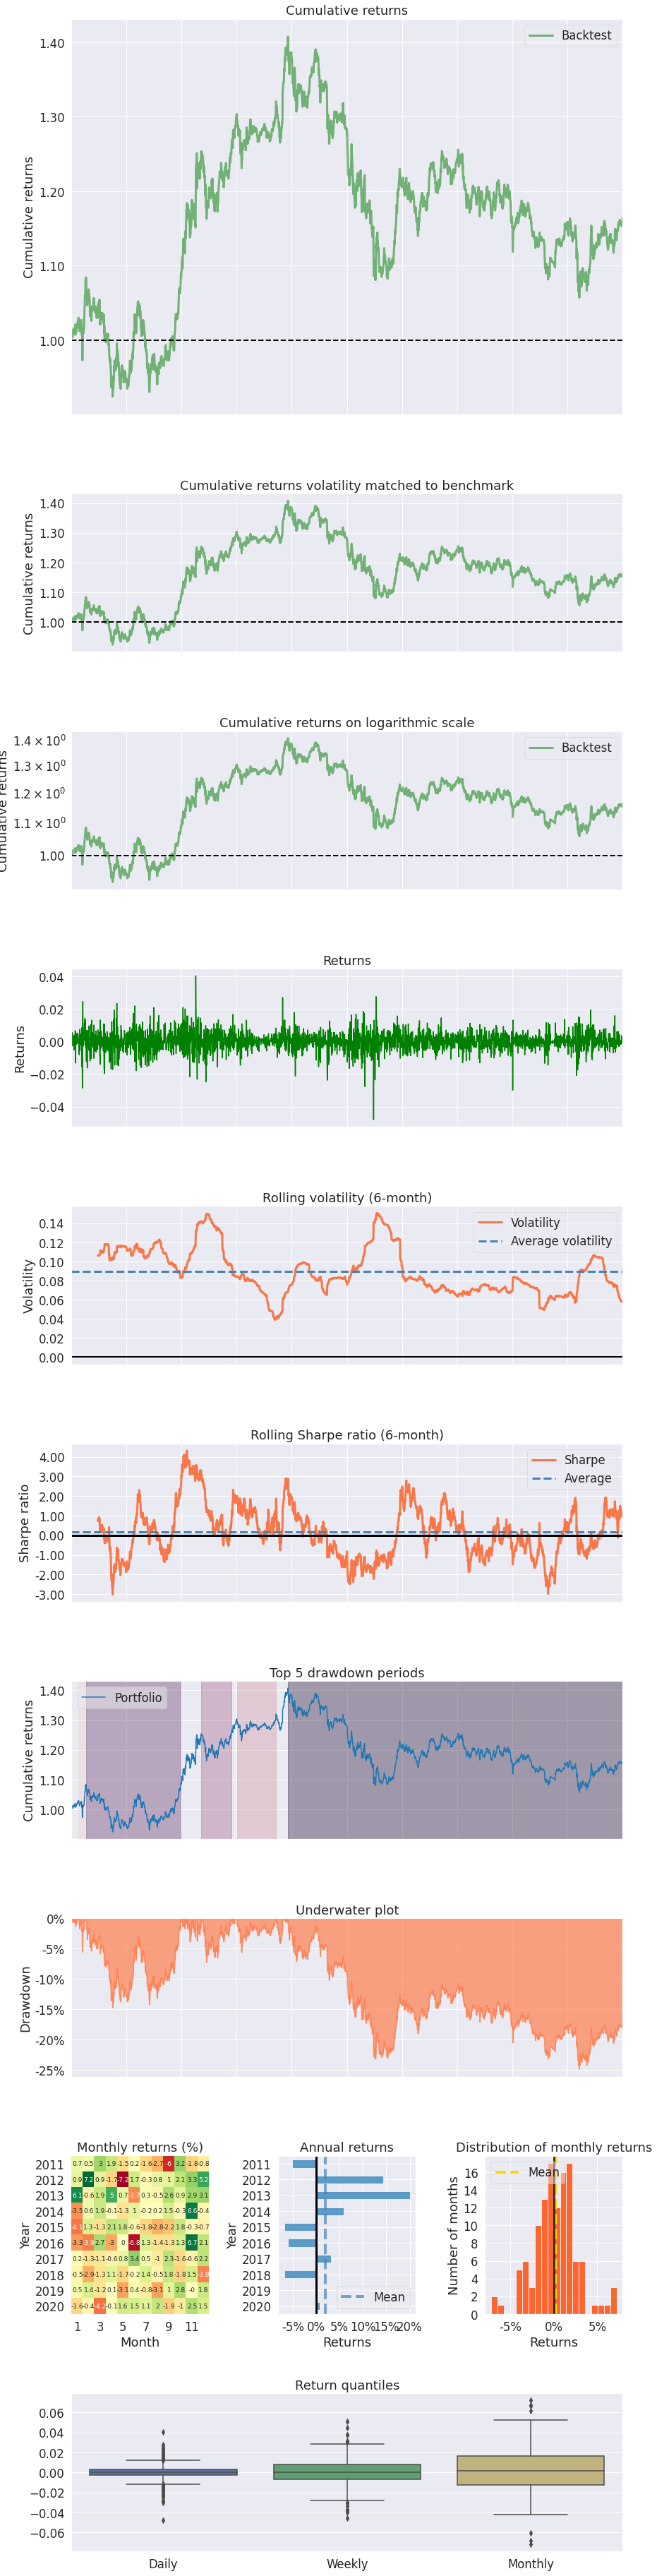

In [31]:
pf.tears.create_returns_tear_sheet(pd.Series(portfolio_total_return))

# Portfolio weights optimized with Kelly criterion

In [32]:
no_of_assets = newdata.shape[1]
no_of_assets

7

In [33]:
weights = cp.Variable(no_of_assets)
weights.shape

(7,)

In [34]:
portfolio_returns = (np.array(newdata)*weights)
portfolio_returns

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


Expression(AFFINE, UNKNOWN, (2608,))

Kelly Criterion

In [35]:
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value

Expression(CONCAVE, UNKNOWN, ())

In [36]:
objective = cp.Maximize(final_portfolio_value)
objective

Maximize(Expression(CONCAVE, UNKNOWN, ()))

In [37]:
constraints = [0.0<=weights, cp.sum(weights)==1]
constraints

[Inequality(Constant(CONSTANT, ZERO, ())),
 Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))]

In [38]:
problem = cp.Problem(objective, constraints)
problem

Problem(Maximize(Expression(CONCAVE, UNKNOWN, ())), [Inequality(Constant(CONSTANT, ZERO, ())), Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ()))])

In [39]:
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

[1.27624591e-10 7.97126647e-12 6.18905253e-12 1.43182070e-11
 2.65470642e-12 1.00000000e+00 2.96601584e-12]


Start date,2011-01-04
End date,2020-12-31
Total months,124
,Backtest
Annual return,3.0%
Cumulative returns,35.7%
Annual volatility,11.3%
Sharpe ratio,0.32
Calmar ratio,0.11
Stability,0.36
Max drawdown,-26.4%


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.41,2011-08-10,2012-07-25,2013-04-11,437
1,25.22,2015-01-19,2016-07-11,NaT,NaN
2,7.29,2014-12-08,2015-01-15,2015-01-16,30
3,5.13,2013-12-31,2014-02-04,2014-11-05,222
4,4.54,2013-04-12,2013-06-17,2013-08-26,97


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

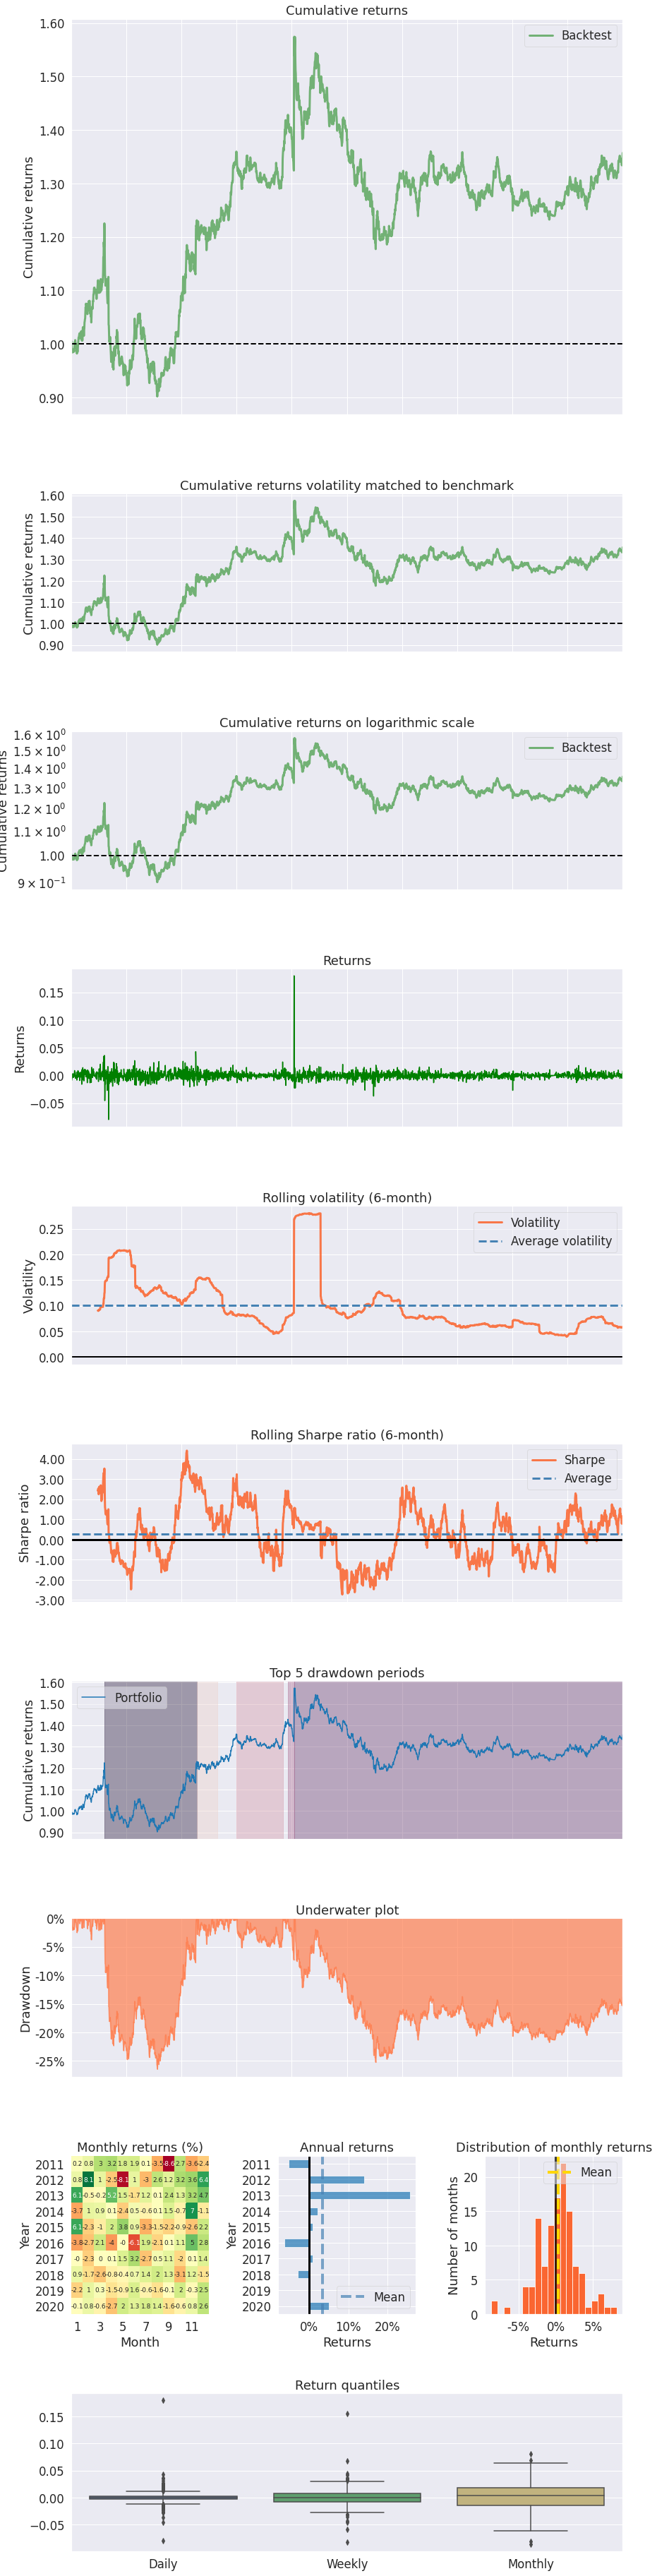

In [40]:
portfolio_total_return_kelly = np.sum(weights.value * newdata, axis=1)
pf.tears.create_returns_tear_sheet(portfolio_total_return_kelly)

Text(0, 0.5, 'Kelly Portfolio Volatility')

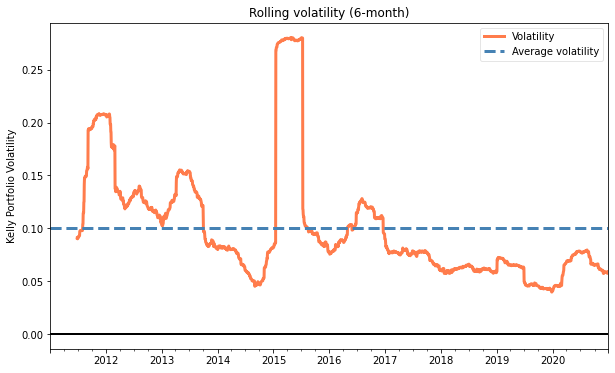

In [41]:
pf.plot_rolling_volatility(portfolio_total_return_kelly,figsize=(10, 6,))
plt.ylabel("Kelly Portfolio Volatility")

Text(0, 0.5, 'Kelly Portfolio Sharpe ratio')

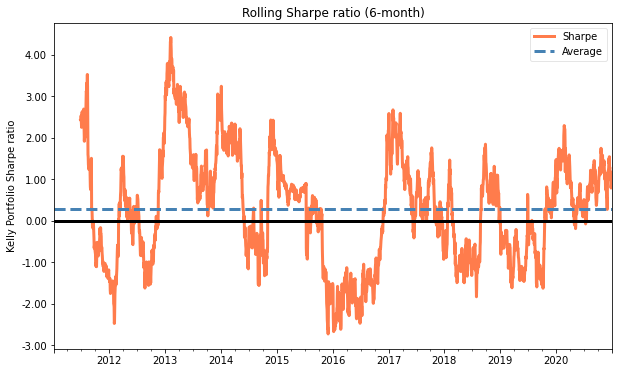

In [42]:
pf.plot_rolling_sharpe(portfolio_total_return_kelly,figsize=(10, 6,))
plt.ylabel("Kelly Portfolio Sharpe ratio")

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Text(0, 0.5, 'Kelly Portfolio Cumulative Returns')

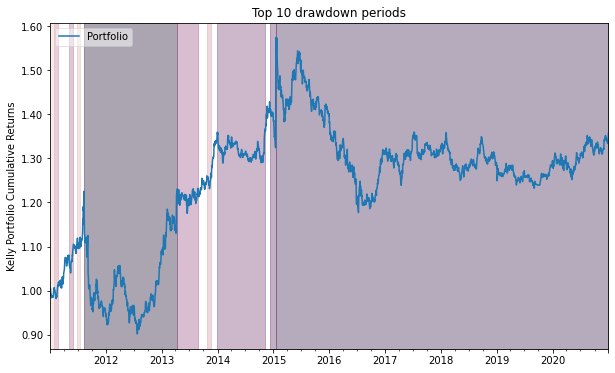

In [43]:
pf.plot_drawdown_periods(portfolio_total_return_kelly,figsize=(10, 6,))
plt.ylabel("Kelly Portfolio Cumulative Returns")

Text(0, 0.5, 'Kelly Portfolio Drawdown')

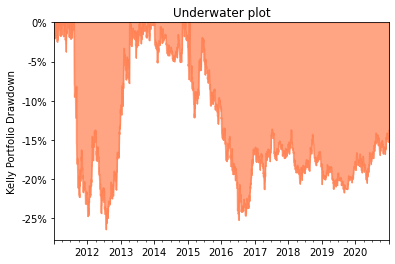

In [44]:
pf.plot_drawdown_underwater(portfolio_total_return_kelly)
plt.ylabel("Kelly Portfolio Drawdown")

# The Efficient Frontier: Markowitz Portfolio Optimization

In [45]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio , annualized
    '''

    p = np.asmatrix(np.mean(returns, axis=1)) * 252
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns)) * 252
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 3*252:
        return random_portfolio(returns)
    return mu, sigma

In [46]:
return_vec = newdata.dropna().values.T
return_vec

array([[ 0.00674281,  0.00450599,  0.01403009, ...,  0.00150682,
        -0.0012538 , -0.00422944],
       [ 0.00654344,  0.00189792,  0.00149174, ...,  0.00301539,
         0.00119148, -0.00034676],
       [ 0.0014414 ,  0.01192544,  0.00812755, ..., -0.00623504,
         0.00122469,  0.0053152 ],
       ...,
       [ 0.00217288, -0.00505413,  0.00653261, ..., -0.00148483,
         0.00161416,  0.00609103],
       [ 0.00487464, -0.0090728 , -0.00578447, ...,  0.00308459,
         0.00295524,  0.00811712],
       [ 0.00710091,  0.0001215 ,  0.01434302, ...,  0.00135194,
         0.00042121,  0.00133274]])

In [47]:
n_portfolios = 10000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

Text(0.5, 1.0, 'Mean and standard deviation of returns of random generated portfolios')

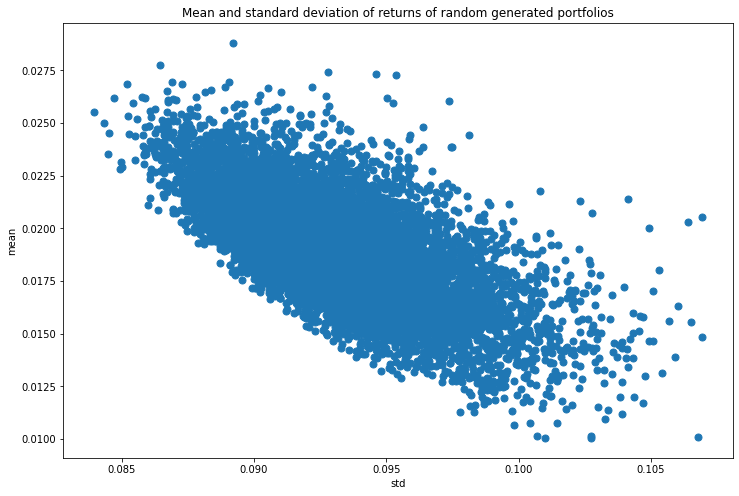

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(stds, means, 'o', markersize=7)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of random generated portfolios')

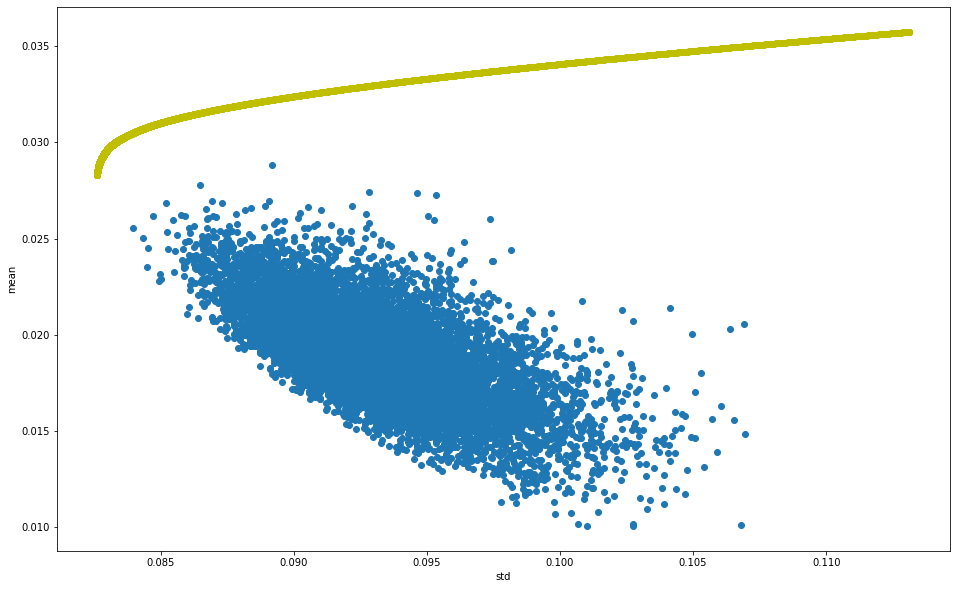

In [50]:
# Turn off progress printing 
solvers.options['show_progress'] = False

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 10000
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.asmatrix(np.cov(returns)*252))
    pbar = opt.matrix(np.asmatrix(np.mean(returns, axis=1)*252))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.figure(figsize=(16, 10))
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [51]:
year_ret = data.mean() * 252
year_volatility = data.cov() * 252
number_of_assets = 7
weights = np.random.random(number_of_assets)
weights /= np.sum(weights)
weights

array([0.17181512, 0.3229332 , 0.21260091, 0.01954628, 0.06909708,
       0.16543631, 0.0385711 ])

In [56]:
np.dot(weights, data.mean())*252
np.dot(weights, np.dot(data.cov()*252, weights))
np.sqrt(np.dot(weights, np.dot(data.cov()*252, weights)))

0.0898542043749807

In [58]:
  portfolio_returns = []
  portfolio_volatilities = []
  for p in range (8000):
      weights = np.random.random(number_of_assets)
      weights /= np.sum(weights)
      portfolio_returns.append(np.sum(data.mean() * weights) * 252)
      portfolio_volatilities.append(np.sqrt(np.dot(weights.T, 
                        np.dot(data.cov() * 252, weights))))
    

In [59]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

Text(0.5, 1.0, 'Mean and standard deviation of mean-variance portfolios')

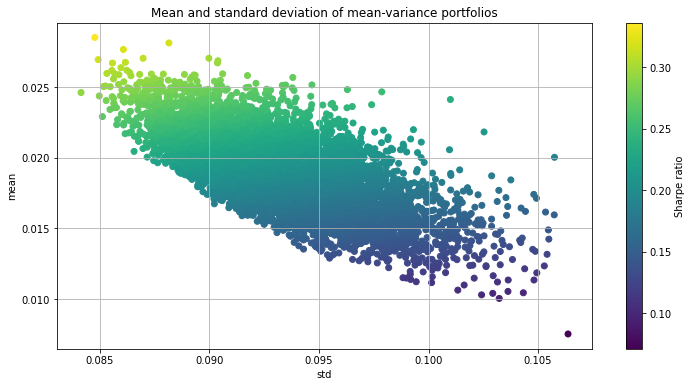

In [60]:
plt.figure(figsize=(12, 6)) 
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o') 
plt.grid(True)
plt.xlabel('std')
plt.ylabel('mean')
plt.colorbar(label='Sharpe ratio')
plt.title('Mean and standard deviation of mean-variance portfolios')

In [61]:
import scipy.optimize as sco

def stats(weights):
    weights = np.array(weights)
    port_returns = np.sum(data.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(data.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

def min_sharpe(weights):
    return -stats(weights)[2]

x0 = 7*[1./7,]

bnds = tuple((0,1) for x in range(7))

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})


opts = sco.minimize(min_sharpe,
                    x0, 
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
opts

     fun: -0.3650557150044065
     jac: array([ 1.18840486e-04,  8.74723271e-02,  1.31896302e-01,  2.51763873e-02,
        2.76686486e-01, -1.35950744e-04,  2.72585116e-01])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.33592656e-01, 0.00000000e+00, 5.68121938e-17, 0.00000000e+00,
       4.33680869e-18, 4.66407344e-01, 1.83013327e-16])

In [62]:
opts['x'].round(3)

array([0.534, 0.   , 0.   , 0.   , 0.   , 0.466, 0.   ])

In [63]:
def min_variance(weights):
    return stats(weights)[1]

optv = sco.minimize(min_variance, 
                    x0, 
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
optv

     fun: 0.08261206038399947
     jac: array([0.08266967, 0.08264859, 0.08455384, 0.08219875, 0.08474321,
       0.08255952, 0.08762289])
 message: 'Optimization terminated successfully'
    nfev: 113
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([6.04829984e-01, 9.86271067e-02, 0.00000000e+00, 6.48006105e-02,
       1.37693676e-17, 2.31742299e-01, 0.00000000e+00])

In [64]:
optv['x'].round(3)

array([0.605, 0.099, 0.   , 0.065, 0.   , 0.232, 0.   ])

# minimum-variance portfolio and maximum-sharpe ratio pofolio

In [67]:
portfolio_total_return_minimum_variance = np.sum([6.04829984e-01, 9.86271067e-02, 0.00000000e+00, 6.48006105e-02,
       1.37693676e-17, 2.31742299e-01, 0.00000000e+00] * newdata, axis=1)

Start date,2011-01-04
End date,2020-12-31
Total months,124
,Backtest
Annual return,2.5%
Cumulative returns,29.4%
Annual volatility,8.3%
Sharpe ratio,0.34
Calmar ratio,0.12
Stability,0.43
Max drawdown,-20.5%


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.45,2015-06-08,2016-08-18,NaT,NaN
1,11.55,2011-04-11,2012-01-09,2012-12-27,449
2,6.97,2013-05-23,2013-06-17,2013-11-22,132
3,4.70,2014-12-08,2015-01-15,2015-05-27,123
4,4.48,2014-01-02,2014-02-04,2014-09-15,183


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

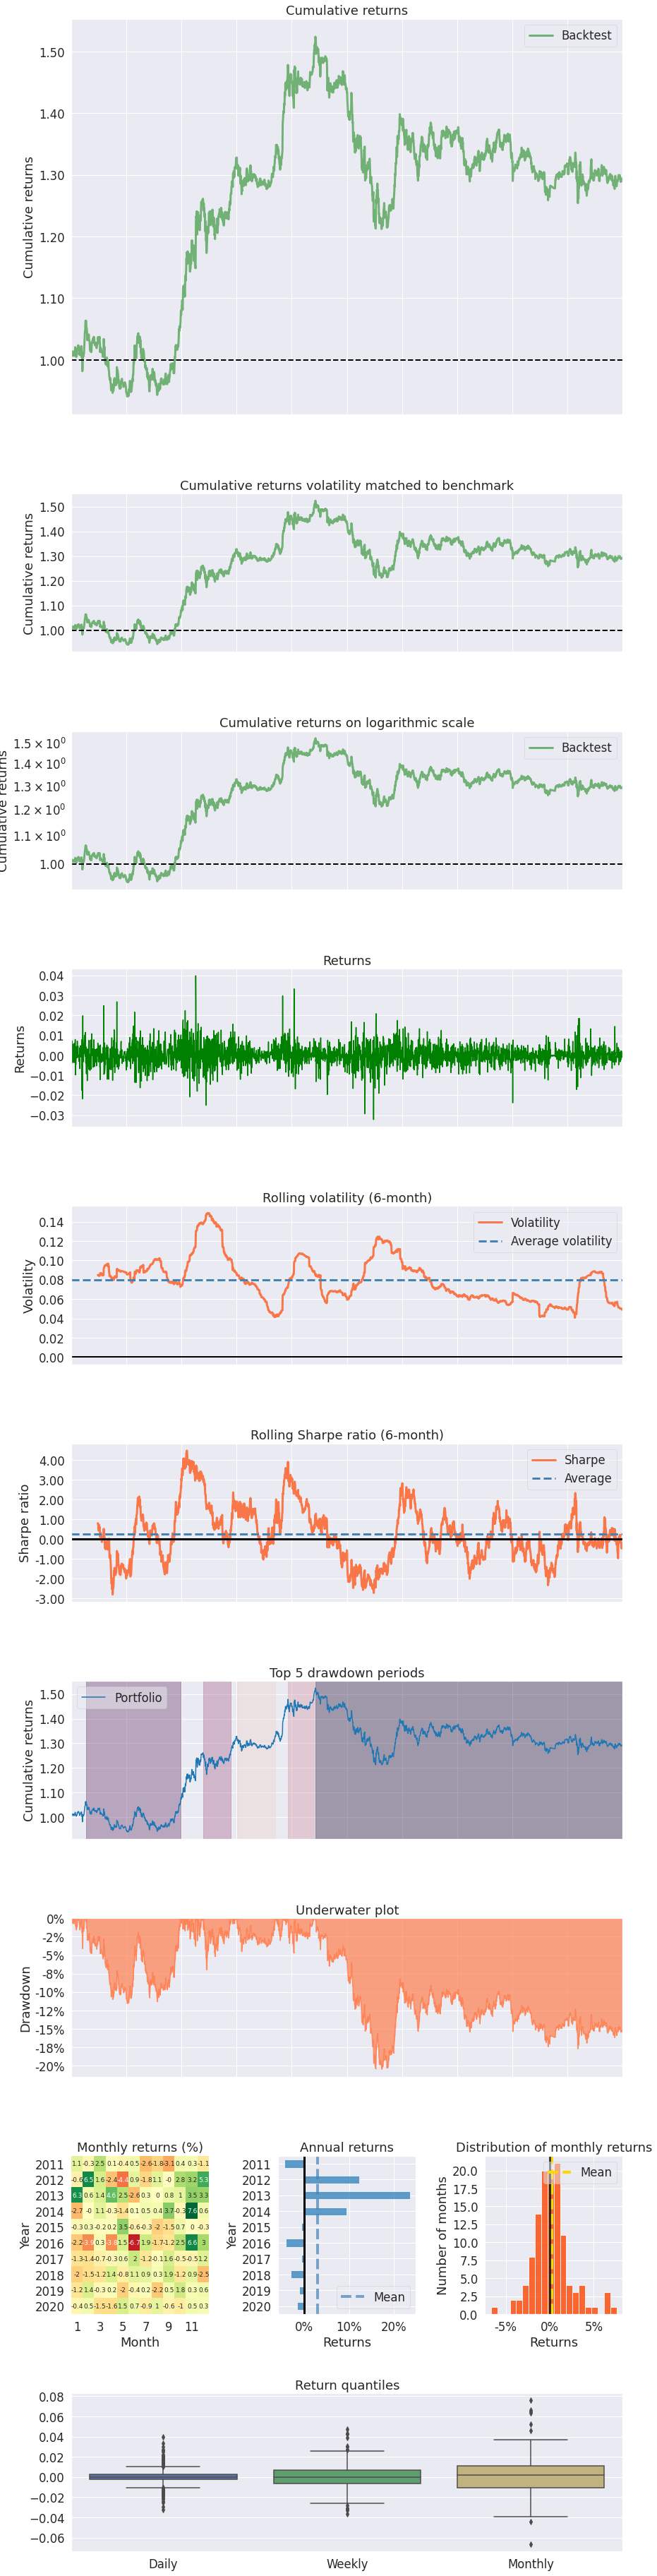

In [68]:
pf.tears.create_returns_tear_sheet(portfolio_total_return_minimum_variance)

In [69]:
portfolio_total_return_maximum_sharpe_ratio = np.sum([5.33592656e-01, 0.00000000e+00, 5.68121938e-17, 0.00000000e+00,
       4.33680869e-18, 4.66407344e-01, 1.83013327e-16] * newdata, axis=1)

Start date,2011-01-04
End date,2020-12-31
Total months,124
,Backtest
Annual return,2.8%
Cumulative returns,33.0%
Annual volatility,8.5%
Sharpe ratio,0.37
Calmar ratio,0.13
Stability,0.46
Max drawdown,-21.4%


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\numpy\core\fromnumeric.py:58: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.41,2015-06-08,2016-07-11,NaT,NaN
1,12.56,2011-08-05,2012-07-25,2012-12-28,366
2,6.00,2013-05-20,2013-06-17,2013-11-15,130
3,5.24,2014-12-08,2015-01-15,2015-01-16,30
4,4.47,2015-01-23,2015-03-12,2015-05-28,90


C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LX\anaconda3\envs\envname\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LX\anaconda3\envs\envname\

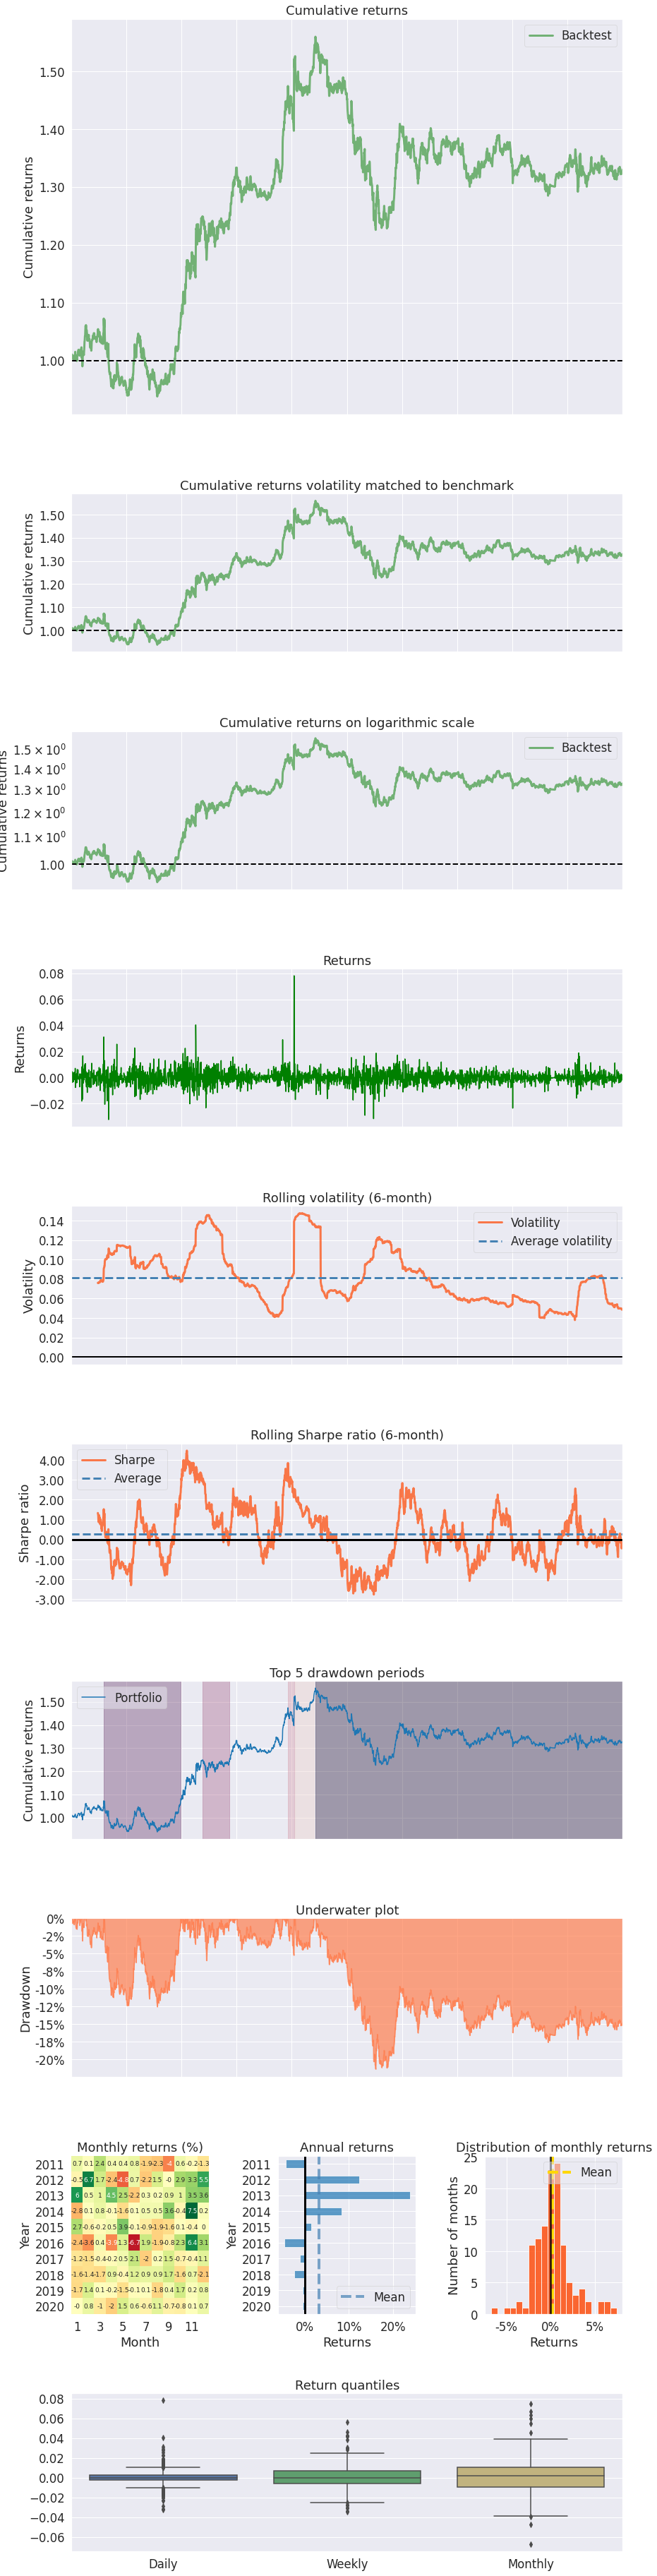

In [70]:
pf.tears.create_returns_tear_sheet(portfolio_total_return_maximum_sharpe_ratio)

### 